In [1]:
!pip install control matplotlib


  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.2.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 1.8 MB/s eta 0:00:00-:--:--
Using cached matp

# PERCOBAAN 1

ANALISIS TANGGAPAN TRANSIEN DARI SISTEM WAKTU KONTINU

{'RiseTime': np.float64(1.9508318073896345), 'SettlingTime': np.float64(3.567737449550412), 'SettlingMin': np.float64(0.901669443478252), 'SettlingMax': np.float64(1.0), 'Overshoot': 0, 'Undershoot': 0, 'Peak': np.float64(0.9988291796067439), 'PeakTime': np.float64(6.028246035447249), 'SteadyStateValue': np.float64(1.0)}
<TransferFunction>: sys[160]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      9
-------------
s^2 + 9 s + 9

{'RiseTime': np.float64(0.4186518350898264), 'SettlingTime': np.float64(3.767866515808438), 'SettlingMin': np.float64(0.8916099269325941), 'SettlingMax': np.float64(1.3292738230033778), 'Overshoot': np.float64(32.92738230033778), 'Undershoot': 0, 'Peak': np.float64(1.3292738230033778), 'PeakTime': np.float64(1.1164048935728705), 'SteadyStateValue': np.float64(1.0)}
<TransferFunction>: sys[165]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      9
-------------
s^2 + 2 s + 9

{'RiseTime': np.float64(0.3351032163829113), 'SettlingTime': nan, 'SettlingMin': np.flo

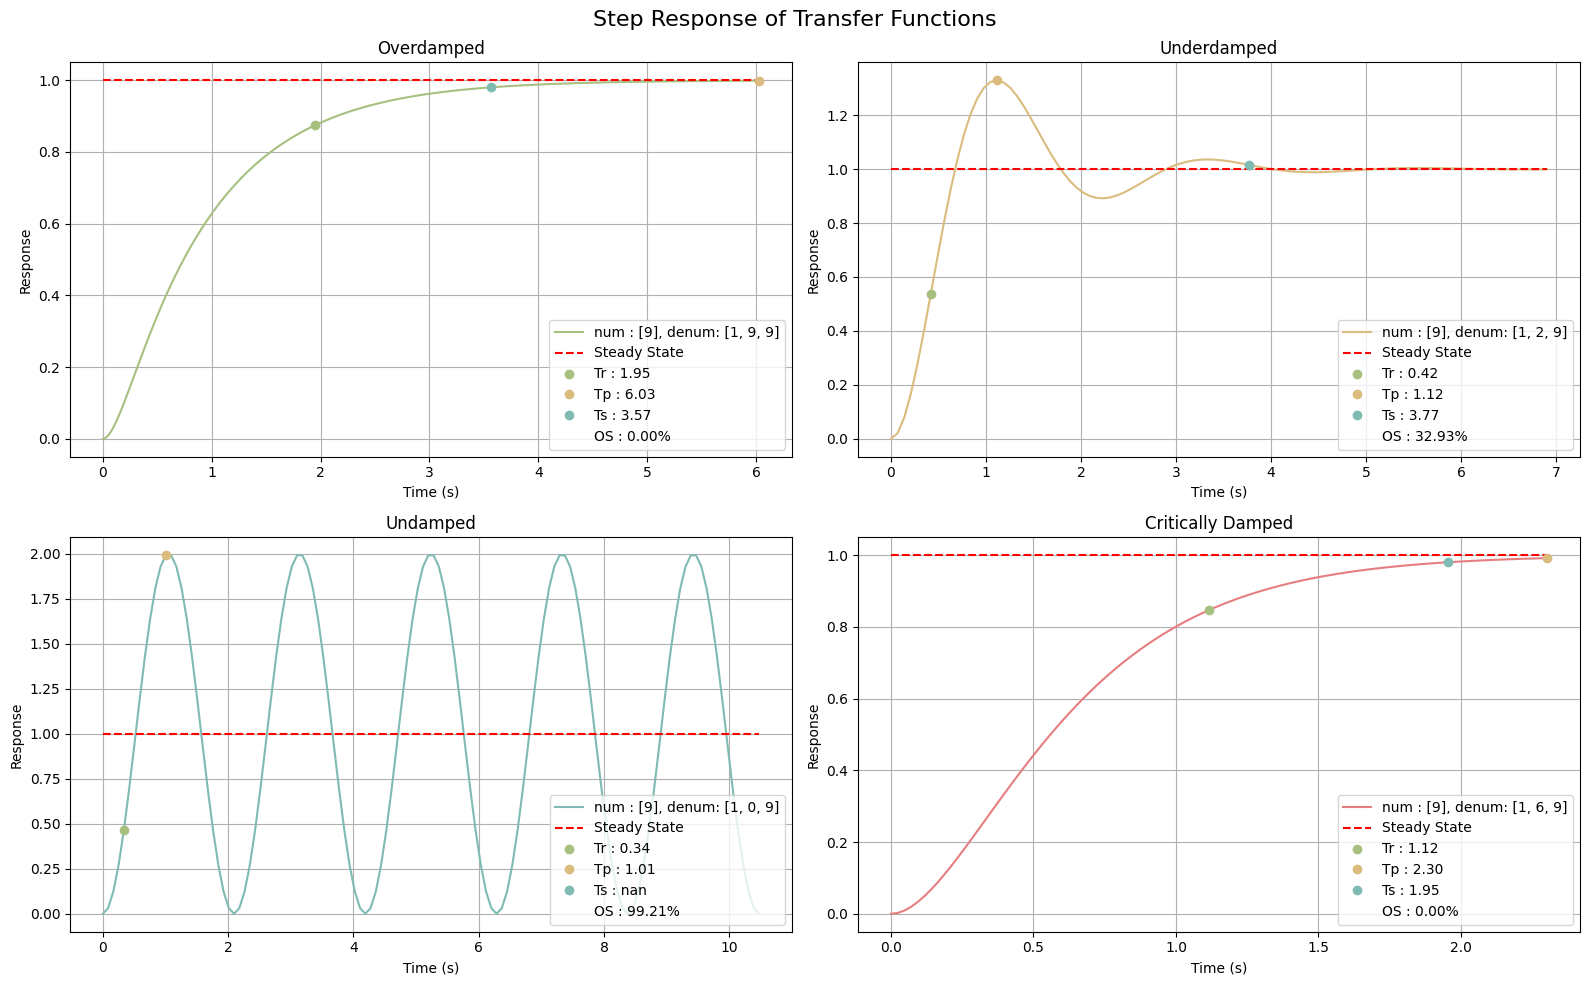

In [ ]:
import matplotlib.pyplot as plt
import control as ctrl
import numpy as np

t = np.linspace(0, 100, 100) # waktu dari 0 sampai 10 detik

# Fungsi Transfer Orde Dua
names = ['Overdamped', 'Underdamped', 'Undamped', 'Critically Damped']
nums = [[9], [9], [9], [9]]
denums = [[1,9,9],[1,2,9],[1,0,9],[1,6,9]]
everforest_colors = [
    "#a7c080",  
    "#dbbc7f",  
    "#7fbbb3",  
    "#e67e80", 
    "#f2c94c", 
]

class info:
    def __init__(self, timeParam: dict, time: list, value: list):
        self.time = time
        self.timeParam = timeParam
        self.value = value
        self.values = {key: None for key in timeParam.keys()}
    
    def getClosestIndex(self, value):
        array = np.array(self.time)
        idx = (np.abs(array - value)).argmin()
        return idx
    
    def getValue(self):
        for key in self.timeParam.keys():
            idx = self.getClosestIndex(self.timeParam[key])
            self.values[key] = self.value[idx]
        return self.value
        
sysObj={
    "name": None,
    "num": None,
    "denum": None,
    "val": None,
    "info": None,
    "color": None
}


sysObjList = []


for i, (num, denum, color, name) in enumerate(zip(nums, denums, everforest_colors, names)):
    sys = ctrl.TransferFunction(num, denum)
    sysObj["name"] = name
    sysObj["num"] = num
    sysObj["denum"] = denum
    sysObj["val"] = ctrl.step_response(sys)
    sysObj["info"] = ctrl.step_info(sys)
    print(sysObj["info"])
    sysObj["color"] = color
    sysObjList.append(sysObj.copy())
    print(sys)


fig, ax = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Step Response of Transfer Functions", fontsize=16)
for i, sysObj in enumerate(sysObjList):
    timeParam = {
        "Tr" : sysObj["info"]["RiseTime"],
        "Tp" : sysObj["info"]['PeakTime'],
        "Ts" : sysObj["info"]["SettlingTime"],
        "OS" : sysObj["info"]["Overshoot"],
        "Td" : sysObj["info"]["Undershoot"],
    }

    infoObj = info(timeParam, sysObj["val"][0], sysObj["val"][1])
    infoObj.getValue()

    ax[i//2, i%2].plot(sysObj["val"][0], sysObj["val"][1], label=f"num : {sysObj['num']}, denum: {sysObj['denum']}", color=sysObj['color'])
    ax[i//2, i%2].plot(sysObj['val'][0], np.ones_like(sysObj['val'][0]), 'r--', label='Steady State')
    for key, timeVal, Val, Color in zip(timeParam.keys(), timeParam.values(), infoObj.values.values(), sysObjList):
        if key == "OS":
            ax[i//2, i%2].plot(0, 0, 'o', label=f"{key} : {timeVal:.2f}%", color='none')
        else:
            ax[i//2, i%2].plot(timeVal, Val, 'o', label=f"{key} : {timeVal:.2f}", color=Color['color'])
    ax[i//2, i%2].set_title(sysObj["name"])
    ax[i//2, i%2].set_xlabel("Time (s)")
    ax[i//2, i%2].set_ylabel("Response")
    ax[i//2, i%2].grid()
    ax[i//2, i%2].legend(loc='best')

plt.tight_layout()
plt.show()
    









{'RiseTime': np.float64(0.3139888763173698), 'SettlingTime': np.float64(1.709494993283458), 'SettlingMin': np.float64(0.9356617613694416), 'SettlingMax': np.float64(1.2533621089794234), 'Overshoot': np.float64(25.336210897942337), 'Undershoot': 0, 'Peak': np.float64(1.2533621089794234), 'PeakTime': np.float64(0.697753058483044), 'SteadyStateValue': np.float64(1.0)}
<TransferFunction>: sys[180]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      25
--------------
s^2 + 4 s + 25

{'RiseTime': np.float64(2.1630344812974367), 'SettlingTime': np.float64(3.9771924333533515), 'SettlingMin': np.float64(0.9), 'SettlingMax': np.float64(1.0), 'Overshoot': 0, 'Undershoot': 0, 'Peak': np.float64(0.9989999999999999), 'PeakTime': np.float64(6.907755278982137), 'SteadyStateValue': np.float64(1.0)}
<TransferFunction>: sys[185]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1
-----
s + 1



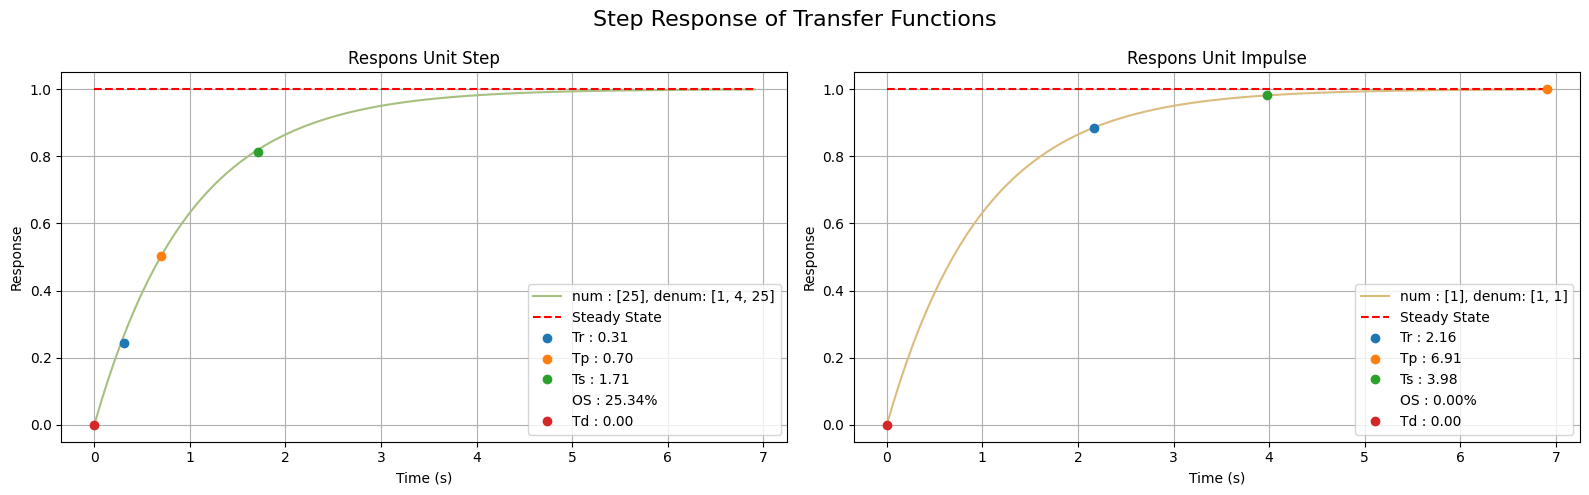

In [13]:
#Response Unit Step

names = ['Respons Unit Step', 'Respons Unit Impulse']
nums = [[25], [1]]
denums = [[1, 4, 25], [1, 1]]
everforest_colors = [
    "#a7c080",  
    "#dbbc7f",  
]

bagian2 = {
    "name" : None,
    "num": None,
    "denum": None,
    "val": {
        "time": None,
        "value": None

    },

    "info": None,
    "color": None

}



bagian2List = []

for i, (num, denum, color, name) in enumerate(zip(nums, denums, everforest_colors, names)):
    sys = ctrl.TransferFunction(num, denum)
    bagian2["name"] = name
    bagian2["num"] = num
    bagian2["denum"] = denum
    bagian2["val"]["time"], bagian2["val"]["value"] = ctrl.step_response(sys)
    bagian2["info"] = ctrl.step_info(sys)
    print(bagian2["info"])
    bagian2["color"] = color
    bagian2List.append(bagian2.copy())
    print(sys)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("Step Response of Transfer Functions", fontsize=16)

for i, bagian in enumerate(bagian2List):
    timeParam = {
        "Tr" : bagian["info"]["RiseTime"],
        "Tp" : bagian["info"]['PeakTime'],
        "Ts" : bagian["info"]["SettlingTime"],
        "OS" : bagian["info"]["Overshoot"],
        "Td" : bagian["info"]["Undershoot"],
    }
    infoObj = info(timeParam, bagian["val"]["time"], bagian["val"]["value"])
    infoObj.getValue()
    ax[i].plot(bagian["val"]["time"], bagian["val"]["value"], label=f"num : {bagian['num']}, denum: {bagian['denum']}", color=bagian['color'])
    ax[i].plot(bagian['val']['time'], np.ones_like(bagian['val']['time']), 'r--', label='Steady State')
    for key, timeVal, Val in zip(timeParam.keys(), timeParam.values(), infoObj.values.values()):
        if key == "OS":
            ax[i].plot(0, 0, 'o', label=f"{key} : {timeVal:.2f}%", color='none')
        else:
            ax[i].plot(timeVal, Val, 'o', label=f"{key} : {timeVal:.2f}")
    ax[i].set_title(bagian['name'])
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Response")
    ax[i].grid()
    ax[i].legend(loc='best')
plt.tight_layout()
plt.show()





# PERCOBAAN 2

TEMPAT KEDUDUKAN AKAR

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

## Syarat Kestabilan Sistem

Syarat kestabilan sistem tergantung pada **jenis sistem** dan analisis yang digunakan (time domain, frequency domain, dsb), tapi secara umum, berikut adalah **syarat kestabilan sistem linier waktu invarian (LTI)**:

---

### ✅ **Syarat Kestabilan Sistem Kontinu (LTI) berdasarkan Letak Poles:**

| Letak Poles (akar karakteristik sistem tertutup)         | **Kondisi Kestabilan**            |
|-----------------------------------------------------------|-----------------------------------|
| Semua Re(s) < 0                                           | ✅ **Stabil Asimtotik**           |
| Ada Re(s) > 0                                             | ❌ **Tidak Stabil**               |
| Semua Re(s) ≤ 0 dan bagian Re(s)=0 tidak berulang         | ⚠️ **Marginal Stabil**           |
| Terdapat akar ganda pada Re(s)=0 (misal s = 0, s = ±jω)   | ❌ **Tidak Stabil (divergen)**    |

---

### 📌 Penjelasan:

- **Stabil**: Respons sistem akan **kembali ke kondisi setimbang** (nol) seiring waktu.
- **Tidak stabil**: Respons sistem akan **terus tumbuh** atau **berosilasi tak terhingga**.
- **Marginal stabil**: Sistem **tidak divergen** tapi **tidak sepenuhnya tenang** (osilasi tetap, tidak mati).


In [4]:
def polarGrid(r_max, ax):
    for r in np.linspace(0.5, r_max, 6):
        circle = plt.Circle((0, 0), r, color='lightgray', fill=False, linestyle='--', linewidth=0.7)
        ax.add_patch(circle)
    for angle_deg in range(0, 360, 30):  # setiap 30 derajat
        angle_rad = np.deg2rad(angle_deg)
        x = r_max * np.cos(angle_rad)
        y = r_max * np.sin(angle_rad)
        ax.plot([0, x], [0, y], color='lightgray', linestyle='--', linewidth=0.7)

def extractLoci(graph):
    solution = {
        'firstSolution' : {
            'real' : [],
            'imag' : []
        },

        'secondSolution' : {
            'real' : [],
            'imag' : []
        }, 

    }
    for i, loci in enumerate(graph.loci):
        solution['firstSolution']['real'].append(np.real(loci[0]))
        solution['firstSolution']['imag'].append(np.imag(loci[0]))
        solution['secondSolution']['real'].append(np.real(loci[1]))
        solution['secondSolution']['imag'].append(np.imag(loci[1]))

    return solution

def graphLoci(poles, ax, K):
    ax.plot(poles['firstSolution']['real'], poles['firstSolution']['imag'],  label='First Solution')
    ax.plot(poles['secondSolution']['real'], poles['secondSolution']['imag'],  label='Second Solution')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.plot(0,0, color='None', label=f'Rentang nilai K adalah dari {K[0]} sampai {K[-1]}')

def graphKvsPoles(fig, axs, K, poles):
    fig.suptitle(f"Hubungan nilai K terhadap Poles diuji dari nilai K dari {K[0]} sampai {K[-1]}")
    axs[0].plot(K, poles['firstSolution']['real'], label='First Solution (Real)')
    axs[0].plot(K, poles['firstSolution']['imag'], label='First Solution (Imaginer)')
    axs[1].plot(K, poles['secondSolution']['real'], label='Second Solution (Real)')
    axs[1].plot(K, poles['secondSolution']['imag'], label='Second Solution (Imaginer)')

    for ax in axs:
        ax.grid()
        ax.set_xlabel("K")
        ax.set_ylabel("Poles")
        ax.legend()
        

### Percobaan I 
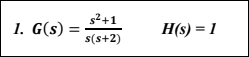

In [8]:
G = ct.tf([1,0,1], [1,2,0])
K = np.linspace(0, 1000, 10000)
graph = ct.root_locus_map(G, K)
print(graph.zeros)
poles = extractLoci(graph)

print(G)
print(graph.poles)

[-0.+1.j  0.-1.j]
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 s^2 + 1
---------
s^2 + 2 s

[-2.+0.j  0.+0.j]


In [11]:
H = ct.tf([1], [1])
print(H)

<TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1
-
1



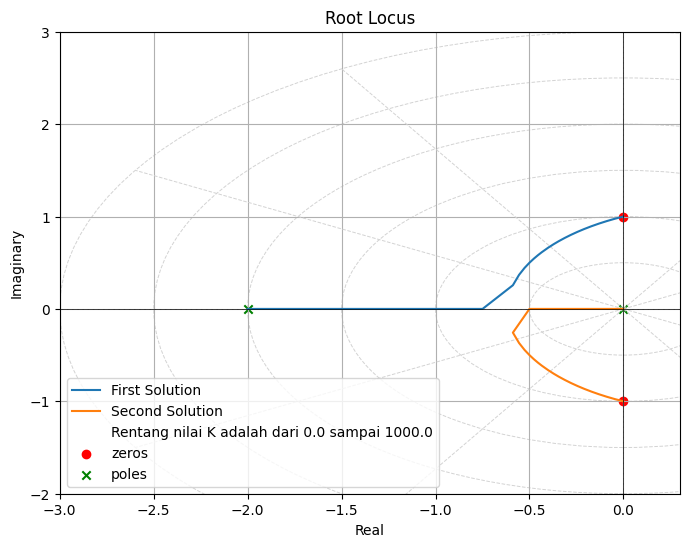

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
polarGrid(3, ax)
graphLoci(poles, ax, K)

ax.scatter(np.real(graph.zeros), np.imag(graph.zeros), marker='o', label='zeros',color='red')
ax.scatter(np.real(graph.poles), np.imag(graph.poles), marker='x', label='poles', color='g')
ax.set_xlim(-3, 0.3)
ax.set_ylim(-2, 3)
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Root Locus')
ax.grid()
ax.legend(loc='lower left')
plt.show()
  

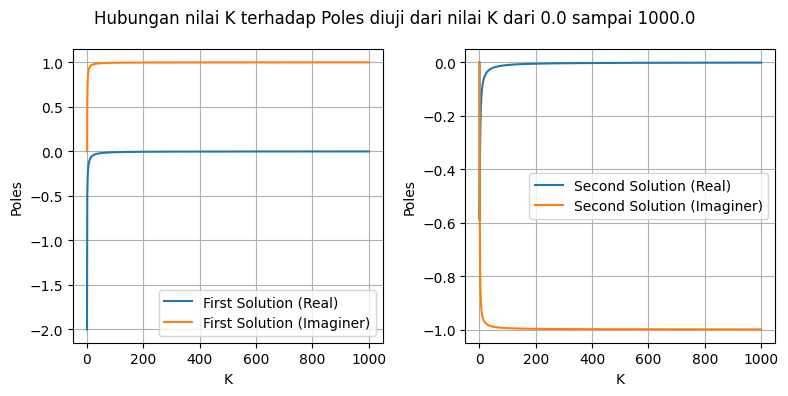

In [5]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(8, 4)

graphKvsPoles(fig, axs, K, poles)

plt.tight_layout()
plt.show()

### Percobaan 2 
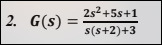

In [12]:
G = ct.tf([2,5,1], [1,2,3])
K = np.linspace(0, 100, 1000)
graph = ct.root_locus_map(G, K)
poles = extractLoci(graph)
print(G)
print(graph.poles)

<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2 s^2 + 5 s + 1
---------------
 s^2 + 2 s + 3

[-1.+1.41421356j -1.-1.41421356j]


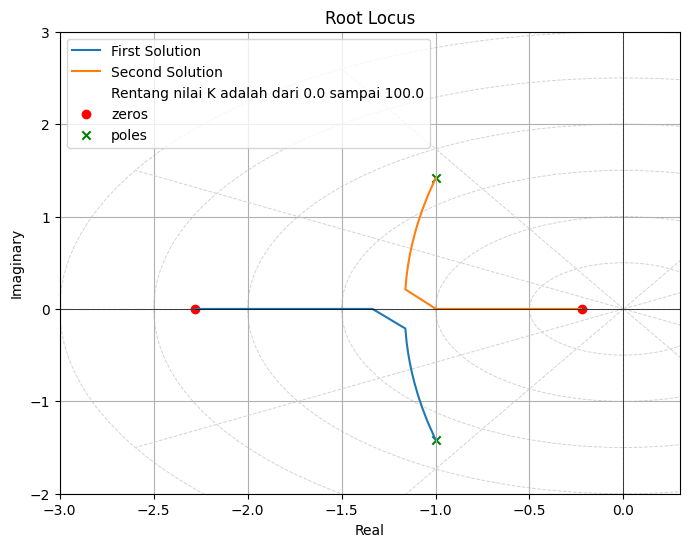

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
polarGrid(3, ax)
graphLoci(poles, ax, K)

ax.scatter(np.real(graph.zeros), np.imag(graph.zeros), marker='o', label='zeros',color='red')
ax.scatter(np.real(graph.poles), np.imag(graph.poles), marker='x', label='poles', color='g')
ax.set_xlim(-3, 0.3)
ax.set_ylim(-2, 3)
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Root Locus')
ax.grid()
ax.legend(loc='upper left')
plt.show()

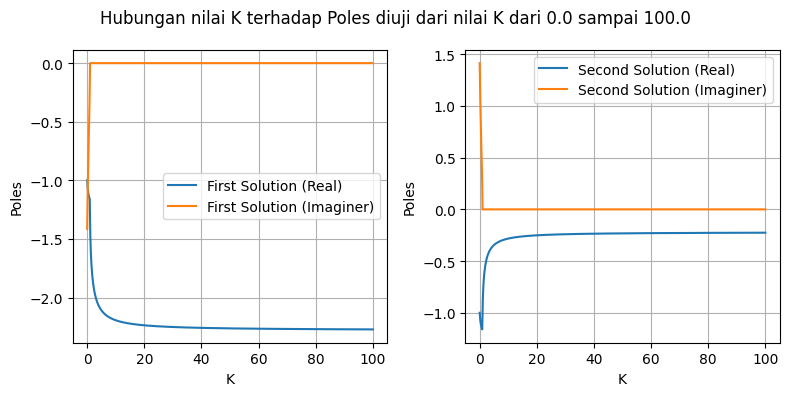

In [24]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(8, 4)

graphKvsPoles(fig, axs, K, poles)

plt.tight_layout()
plt.show()

### Percobaan 3
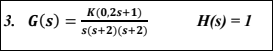

In [13]:
G = ct.tf([0.2, 1], [1,4,4,0])
K = np.square(np.linspace(0, 10, 1000))
graph = ct.root_locus_map(G, K)
poles = extractLoci(graph)
print(G)
print(graph.poles)

<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    0.2 s + 1
-----------------
s^3 + 4 s^2 + 4 s

[-2.+0.j -2.+0.j  0.+0.j]


894


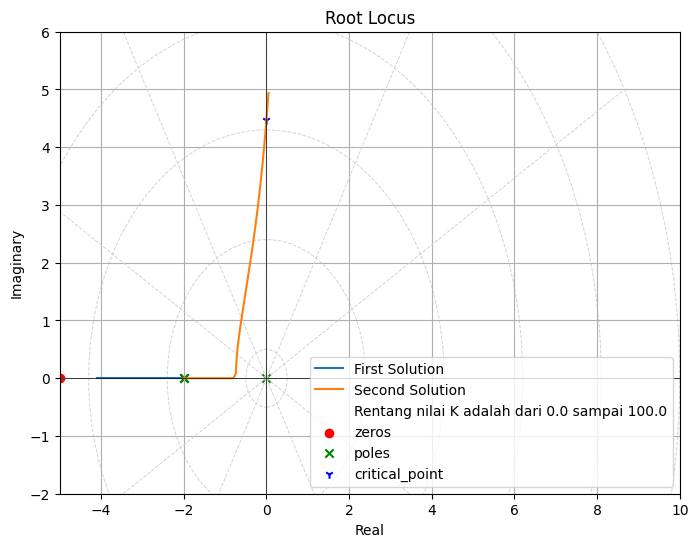

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
polarGrid(10, ax)
graphLoci(poles, ax, K)
critical_point_idx = np.abs(poles['secondSolution']['real']).argmin()
print(critical_point_idx)

ax.scatter(np.real(graph.zeros), np.imag(graph.zeros), marker='o', label='zeros',color='red')
ax.scatter(np.real(graph.poles), np.imag(graph.poles), marker='x', label='poles', color='g')
ax.scatter(poles['secondSolution']['real'][critical_point_idx], poles['secondSolution']['imag'][critical_point_idx], marker='1', label='critical_point', color='b')
ax.set_xlim(-5, 10)
ax.set_ylim(-2, 6)
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Root Locus')
ax.grid()
ax.legend(loc='lower right')
plt.show()

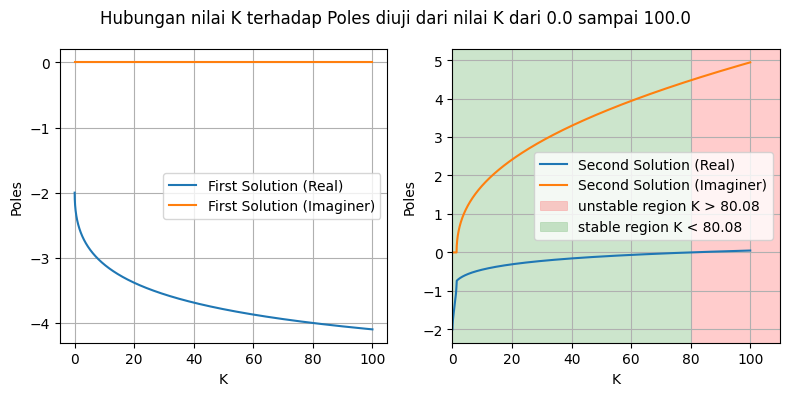

In [54]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(8, 4)

graphKvsPoles(fig, axs, K, poles)
axs[1].axvspan(K[critical_point_idx], 110, color='red', alpha=0.2, linewidth=0.5, label=f'unstable region K > {K[critical_point_idx]:.2f}')
axs[1].axvspan(0, K[critical_point_idx], color='green', alpha=0.2, linewidth=0.5, label=f'stable region K < {K[critical_point_idx]:.2f}')
axs[1].set_xlim(0, 110)
axs[1].legend()
plt.tight_layout()
plt.show()

## Analysis Transient Sistem

### PERCOBAAN I
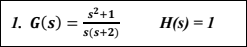

[0.3   0.475 0.65  0.825 1.   ]


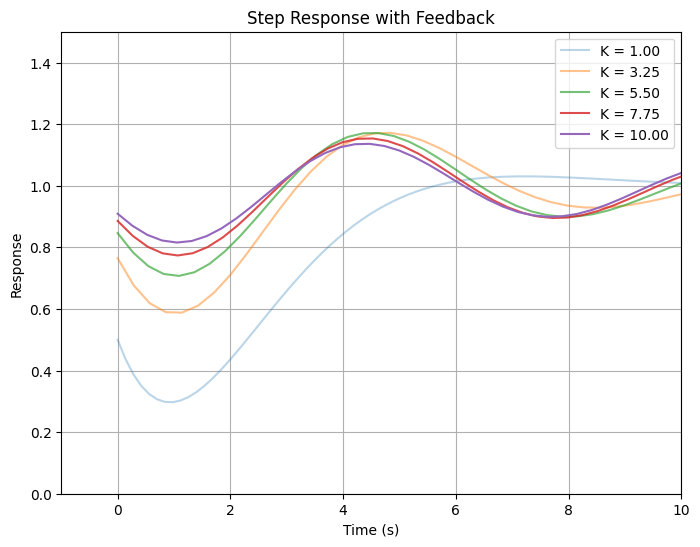

In [121]:

G =ct.tf([1,0,1], [1,2,0])
H = ct.tf([1], [1])
Ks = np.linspace(1, 10, 5)
Alphas = np.linspace(0.3, 1, len(Ks))
print(Alphas)
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
for k, a in zip(Ks, Alphas):
  plant = G*k
  T = ct.feedback(plant, H)
  t, y = ct.step_response(T)
  ax.plot(t, y, label=f'K = {k:.2f}', alpha=a)

ax.set_title('Step Response with Feedback')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response')
ax.grid()
ax.legend()
ax.set_ylim(0, 1.5)
ax.set_xlim(-1, 10)
plt.show()




### PERCOBAAN 2
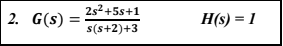

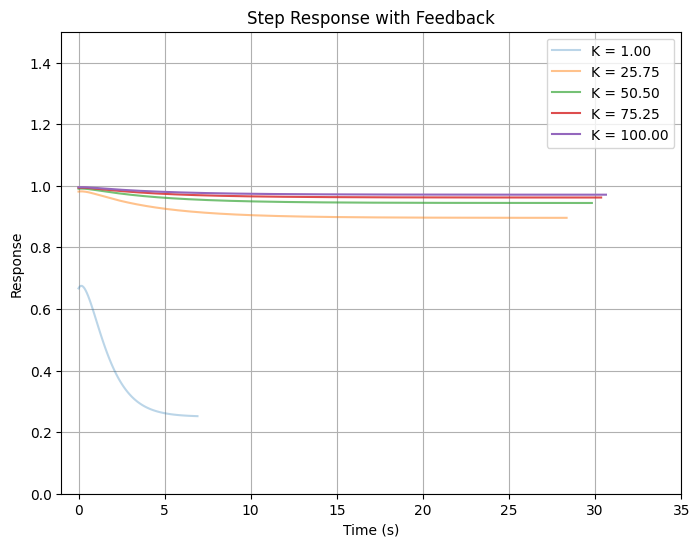

In [131]:
G = ct.tf([2,5,1], [1,2,3])
K = np.linspace(1, 100, 5)
Alphas = np.linspace(0.3, 1, len(K))
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
for k, a in zip(K, Alphas):
  plant = G*k
  T = ct.feedback(plant, H,)
  t, y = ct.step_response(T)
  ax.plot(t, y, label=f'K = {k:.2f}', alpha=a)
ax.set_title('Step Response with Feedback')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response')
ax.grid()
ax.legend()
ax.set_ylim(0, 1.5)
ax.set_xlim(-1, 35)
plt.show()

### PERCOBAAN 3
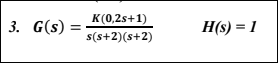

In [155]:
# Definisikan warna 'green' dan 'red' dalam RGB
green = np.array([0.0, 0.5, 0.0])  # matplotlib 'green'
red = np.array([1.0, 0.0, 0.0])    # matplotlib 'red'

# Interpolasi linear 5 langkah dari green ke red
colors = [green + (red - green) * i/4 for i in range(5)]

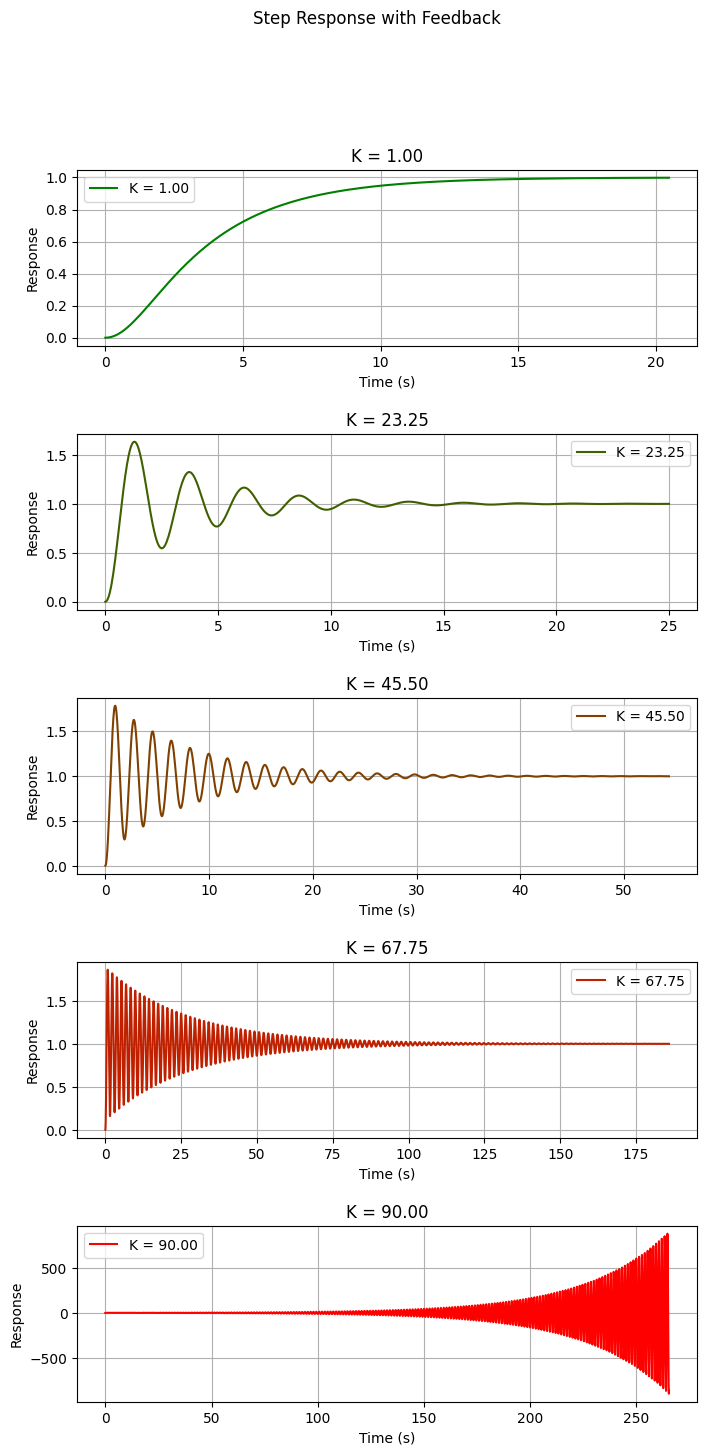

In [156]:
G = ct.tf([0.2,1], [1,4,4,0])
K = np.linspace(1, 90, 5)
Alphas = np.linspace(0.3, 1, len(K))
fig, ax = plt.subplots(5)
fig.set_size_inches(8, 16)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Step Response with Feedback')
for i, (k, a, color) in enumerate(zip(K, Alphas, colors)):
    plant = G*k
    T = ct.feedback(plant, H,)
    t, y = ct.step_response(T)
    ax[i].plot(t, y, label=f'K = {k:.2f}', color=color)
    ax[i].grid()
    ax[i].set_title(f'K = {k:.2f}')
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Response')
    ax[i].legend()
plt.show()